# Exercises in statistics

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("energySoftware.csv")
df.sample(frac=0.2)

,test,PKG,CPU,nn,nn2,time
332,bubblesort_ll,0.020325,0.015076,,,2.511
385,bubblesort,0.013184,0.010681,,,1.968
311,bubblesort_ll2,0.023438,0.017334,,,3.611
1308,bubblesort_ll,0.013733,0.014587,,,2.453
650,bubblesort_func,0.024353,0.017456,,,3.562
...,...,...,...,...,...,...
465,bubblesort_ll,0.020325,0.013489,,,2.497
191,bubblesort_ll2,0.017273,0.017517,,,3.653
955,bubblesort_ll,0.020691,0.014709,,,2.481
174,bubblesort_func,0.018616,0.018127,,,3.398


<h3>Exploring the data</h>

In [2]:
from IPython.display import display

display(df.describe())
print("\n" + "-"*50 + "\n")

print("DataFrame Info")
df.info()
print( "-"*50 )

print("Is anything null?")
print(df.isnull().sum())


,PKG,CPU,time
count,1441.000000,1441.000000,1441.000000
mean,0.017618,0.015021,3.009384
std,0.004464,0.003192,0.571439
min,0.008179,0.007812,1.962000
25%,0.013733,0.012939,2.462000
50%,0.017761,0.015747,3.363000
75%,0.020874,0.017822,3.524000
max,0.026794,0.020325,4.244000



--------------------------------------------------

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test    1441 non-null   object 
 1   PKG     1441 non-null   float64
 2   CPU     1441 non-null   float64
 3   nn      1441 non-null   object 
 4   nn2     1441 non-null   object 
 5   time    1441 non-null   float64
dtypes: float64(3), object(3)
memory usage: 67.7+ KB
--------------------------------------------------
Is anything null?
test    0
PKG     0
CPU     0
nn      0
nn2     0
time    0
dtype: int64


In [3]:
print("Shape:\n", df.shape,"\n")

print("Columns and types:")
print(df.dtypes,"\n")
# Checking this column for unique values since it has categorical data
print("Unique test types:\n", df['test'].unique())

Shape:
 (1441, 6) 

Columns and types:
test     object
PKG     float64
CPU     float64
nn       object
nn2      object
time    float64
dtype: object 

Unique test types:
 ['bubblesort' 'bubblesort_func' 'bubblesort_ll2' 'bubblesort_ll']


<hr>

1. Plot the distribution of CPU for each test type




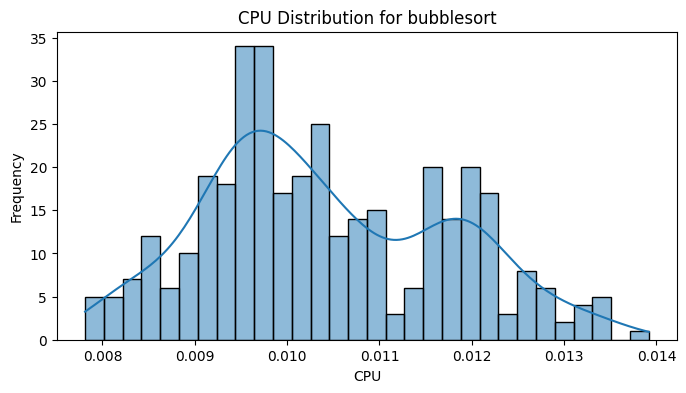

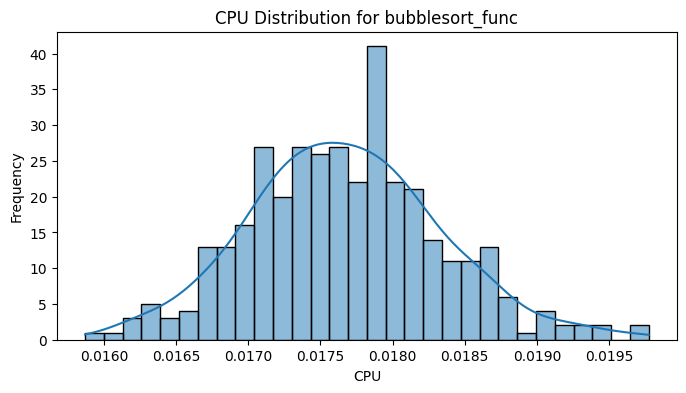

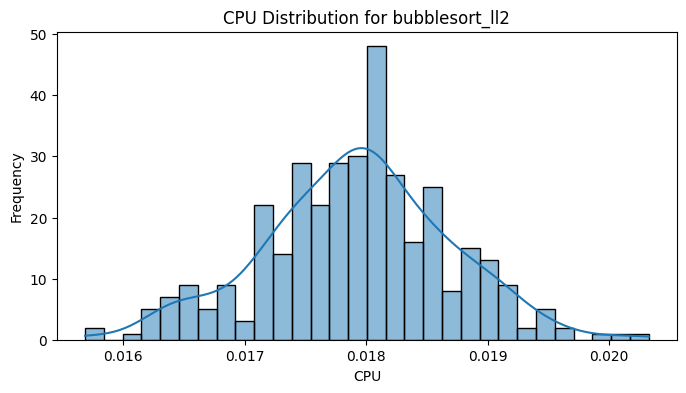

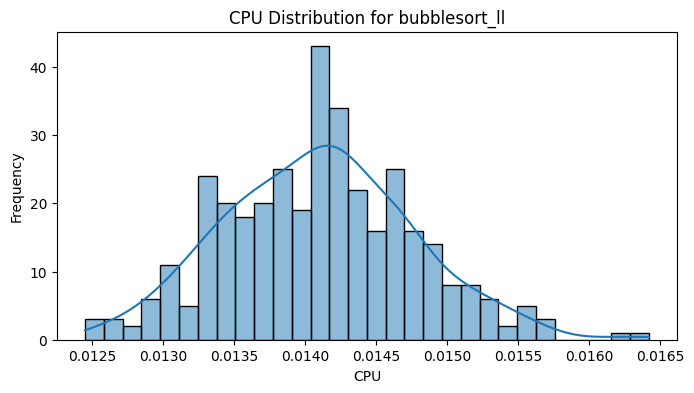

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Since there only are 4 different inique test types 
# and we need to plot CPU distribution foreach.
# We loop through and create a histogram for testType.
testTypeArray = df['test'].unique()

for testType in testTypeArray:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df['test'] == testType]['CPU'], bins = 30, kde=True)
    plt.title(f'CPU Distribution for {testType}')
    plt.xlabel('CPU')
    plt.ylabel('Frequency')
    plt.show()

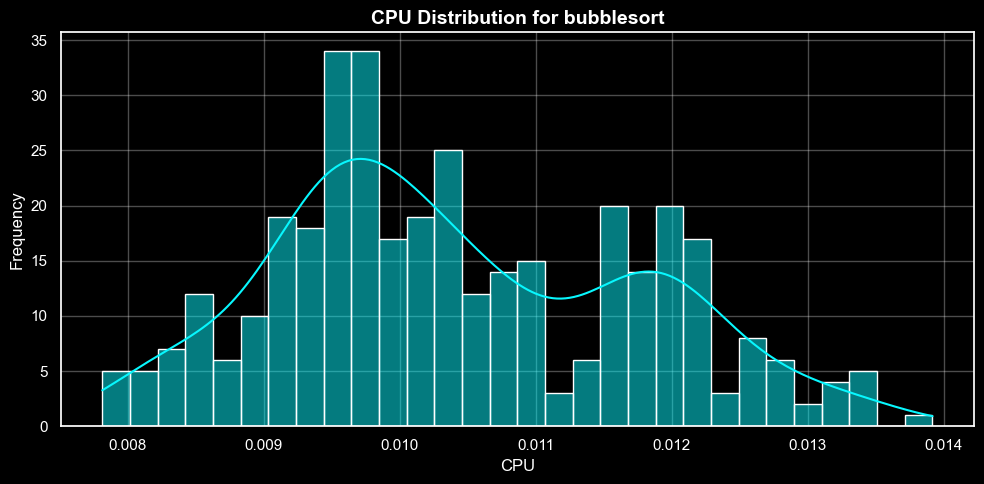

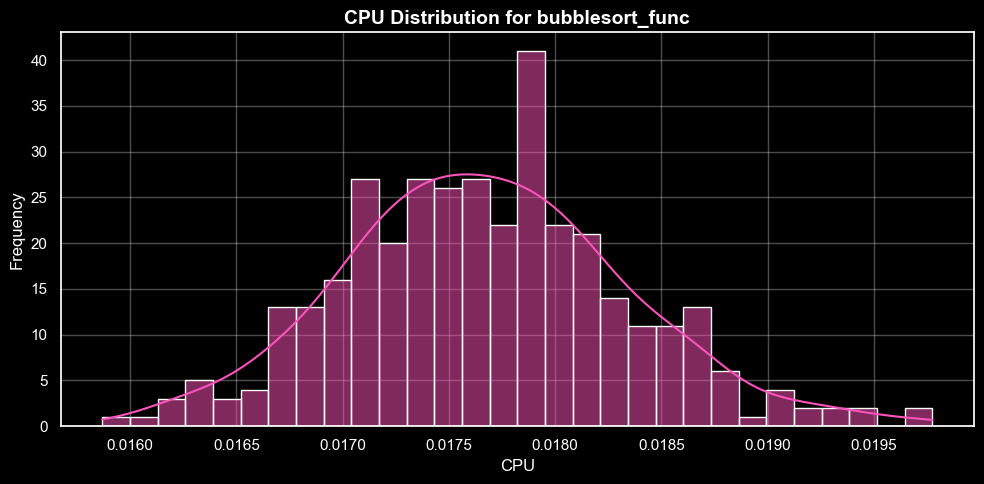

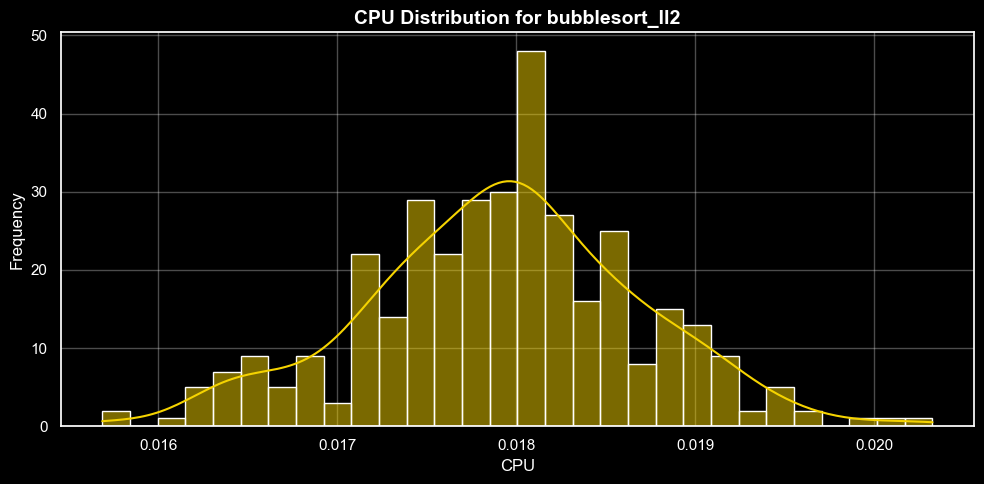

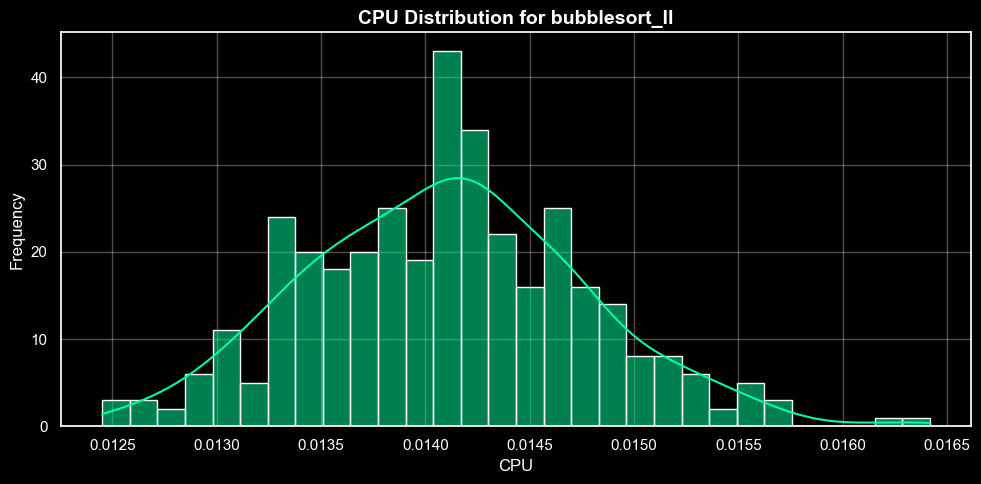

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns


sns.set_style('darkgrid')
plt.style.use('dark_background')
some_colors = ['#08F7FE', '#FE53BB', '#F5D300', '#00ff9f']

# This is the same cell as above, but with some extra styling to try perameters.

testTypeArray = df['test'].unique()
i = 0
for testType in testTypeArray:
    
    plt.figure(figsize=(10, 5))
    sns.histplot(df[df['test'] == testType]['CPU'], bins = 30, kde=True, color=some_colors[i % len(some_colors)], edgecolor='white', linewidth=1)
    plt.title(f'CPU Distribution for {testType}', fontsize=14, color='white', weight='bold')
    plt.xlabel('CPU', fontsize=12, color='white')
    plt.ylabel('Frequency', fontsize=12, color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    i = i + 1

# Reset the style to default for further plots
sns.set_theme()
plt.style.use('default')

<hr><br>
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 


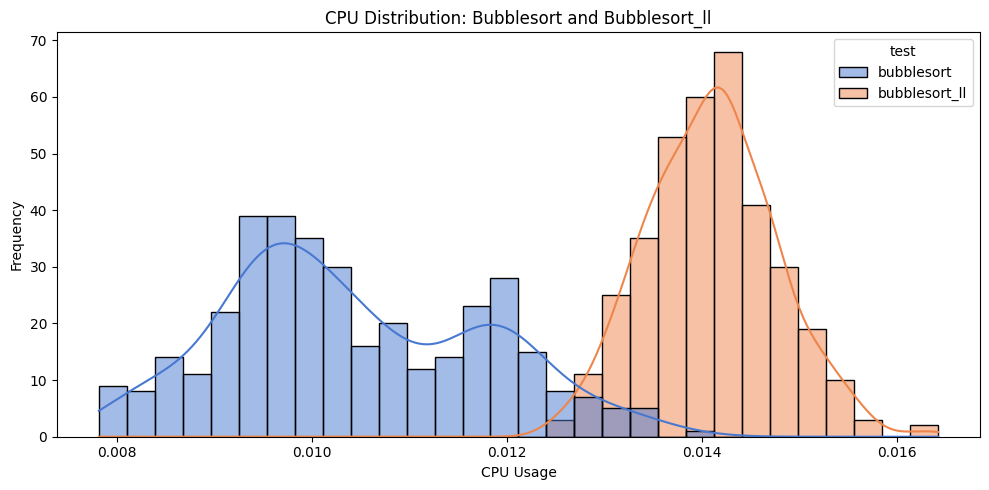

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

cpu_bubblesort = df[df['test'] == 'bubblesort']['CPU']
cpu_bubblesort_ll = df[df['test'] == 'bubblesort_ll']['CPU']
df_compare = df[df['test'].isin(['bubblesort', 'bubblesort_ll'])]
                
plt.figure(figsize=(10, 5))
sns.histplot(data=df_compare, x='CPU', hue='test', bins=30, kde=True, palette='muted')

plt.title('CPU Distribution: Bubblesort and Bubblesort_ll')
plt.xlabel('CPU Usage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<h4>Choosing test : </h>
<h5>Since <code>bubblesort</code> is tested with Shapiro-Wilk to acceptable null-hypothesis and <code>bubblesort_ll</code> is tested with Shapiro-Wilk to reject null-hypothesis, 
<br><code>bubblesort</code> is non-normal, while <code>bubblesort_ll</code> is normal. Thats our first indicator for which test to choose.
<br>Secondly both are two independent groups. Whith these two indicators, a suitable test is <b>"Mann-Whitney U"</b>, 
<br> since <b>t-test</b> require both datasets to be normalized
</h>

<p>Here we test <code>bubblesort</code> and  <code>bubblesort_ll</code> for normality. 
<br><br>
The results are as expected as <code>bubblesort_ll</code> does look slighly like a bell-curve, while <code>bubblesort</code> does not</p>

In [34]:
from scipy.stats import shapiro

print("Shapiro-Wilk test for bubblesort:")
print(shapiro(cpu_bubblesort), "\n")

print("Shapiro-Wilk test for bubblesort_ll:")
print(shapiro(cpu_bubblesort_ll))

Shapiro-Wilk test for bubblesort:
ShapiroResult(statistic=np.float64(0.97149957608177), pvalue=np.float64(1.5722188157994535e-06)) 

Shapiro-Wilk test for bubblesort_ll:
ShapiroResult(statistic=np.float64(0.9948246948673037), pvalue=np.float64(0.26921286581817916))


<li>Buttlesort</li> <p>P-value below 0.05 = meaning it we accept null-hypothesis and I don't worry about the data being normalized </p>
<br>
<li>Bubblesort_ll</li> <p>tested to be normal. It also looks bell-curved. P-value is greater than 0.05 = reject null-hypothesis</p>

<hr>

In [27]:
from scipy.stats import mannwhitneyu

cpu_bubblesort = df[df['test'] == 'bubblesort']['CPU']
cpu_bubblesort_ll = df[df['test'] == 'bubblesort_ll']['CPU']

u_statistic, p_value = mannwhitneyu(cpu_bubblesort, cpu_bubblesort_ll)

print(f"Mann-Whitney U Test")
print(f"U statistic: {u_statistic}")
print(f"p-value: {p_value:.4f}")


Mann-Whitney U Test
U statistic: 645.5
p-value: 0.0000


In [22]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(cpu_bubblesort, cpu_bubblesort_ll, equal_var=True)
print(f"T-test result: t = {t_stat:.4f}, p = {p_val:.4f}")

T-test result: t = -47.4605, p = 0.0000


In [23]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(cpu_bubblesort, cpu_bubblesort_ll)
print(f"Mann-Whitney U test result: U = {u_stat}, p = {p_val:.4f}")

Mann-Whitney U test result: U = 645.5, p = 0.0000


3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?


4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).


5. Perform an ANOVA test to test if there is a difference in means across groups for CPU


6. Perform an ANOVA test to test if there is a difference in means across groups for time